In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import astropy.units as u

In [2]:
plt.style.use('notebook')

In [3]:
t = Table.read('../data/gaia_cvz_g13.fits.gz')
ind_okpi = t['parallax_over_error']>20
t = t[ind_okpi]
print(len(t), np.size(ind_okpi))

/usr/lib64/python3.6/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


79510 94543


In [4]:
print(t.colnames)

['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_erro

In [5]:
distance = 1/t['parallax'] * u.kpc / u.mas
dm = 5*np.log10(distance.to(u.pc).value) - 5
G = t['phot_g_mean_mag'] - dm

In [6]:
bp_rp0 = t['bp_rp'] - t['e_bp_min_rp_val']
G0 = G - t['a_g_val']

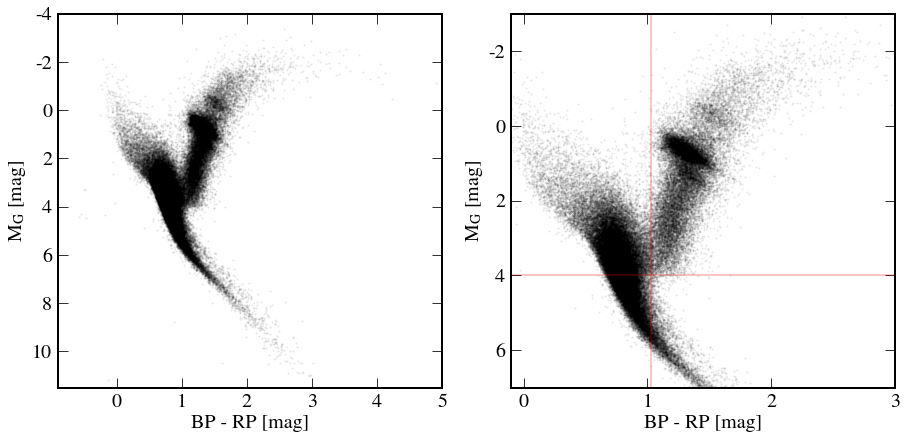

In [7]:
fig, ax = plt.subplots(1,2, figsize=(13,6.5))

plt.sca(ax[0])
plt.plot(t['bp_rp'], G, 'ko', mew=0, ms=2, alpha=0.1)
# plt.plot(bp_rp0, G0, 'ro', mew=0, ms=2, alpha=0.1)

plt.xlim(-0.9, 5)
plt.ylim(11.5,-4)

plt.xlabel('BP - RP [mag]')
plt.ylabel('$M_G$ [mag]')

plt.sca(ax[1])
plt.plot(t['bp_rp'], G, 'ko', mew=0, ms=2, alpha=0.1)
plt.axvline(1.03, color='r', alpha=0.3)
plt.axhline(4, color='r', alpha=0.3)

plt.xlim(-0.1, 3)
plt.ylim(7,-3)

plt.xlabel('BP - RP [mag]')
plt.ylabel('$M_G$ [mag]')

plt.tight_layout()

In [8]:
ind_giants = (t['bp_rp']>1.03) & (G<4)
ind_bright = (t['phot_g_mean_mag']>9) & (t['phot_g_mean_mag']<10)
print(np.sum(ind_giants & ind_bright))

2297


In [9]:
np.savez('../data/giants_ids', id=t['source_id'][ind_giants & ind_bright])

In [12]:
G[:10]

1.6593846208920429
2.154103553801992
0.7785152080703135
2.513241456276976
2.700374460507369
3.6574166230582126
0.30572529763916023
4.059781577364651
0.2638216194001899
0.8991303775108364


In [13]:
tgiants = t[ind_giants & ind_bright]

In [14]:
tgiants.write('../data/giants.fits', overwrite=True)

In [63]:
f = np.load('../data/giants_ids.npz')

In [64]:
f['id']

array([4650802592000604416, 4793052149352862080, 5266286764318335872, ...,
       5499335194485501312, 5491438158378875008, 5491386481331862400])